# ZOMATO RESTAURANT PROJECT

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [7]:
df1 = pd.read_excel(r"C:\Users\chaud\Downloads\Country-Code.xlsx")
df1

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [8]:
df2 =pd.read_csv(r"C:\Users\chaud\Downloads\zomato.csv", encoding='latin1')
df2

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [9]:
df = df1.merge(df2, how='left', on='Country Code')
df

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,India,3400025,Jahanpanah,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
1,1,India,3400341,Rangrezz Restaurant,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
2,1,India,3400005,Time2Eat - Mama Chicken,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
3,1,India,3400021,Chokho Jeeman Marwari Jain Bhojanalya,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,...,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
4,1,India,3400017,Pinch Of Spice,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,...,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,216,United States,17697389,The Screaming Eagle,Waterloo,"228 E 4th St., Waterloo, IA 50703",Waterloo,"Waterloo, Waterloo",-92.335523,42.498400,...,Dollar($),No,No,No,No,1,3.7,Yellow,Good,101
9547,216,United States,17697424,The Thai Bowl,Waterloo,"624 Sycamore Street, Waterloo, IA 50703",Waterloo,"Waterloo, Waterloo",-92.335769,42.497919,...,Dollar($),No,No,No,No,1,3.5,Yellow,Good,58
9548,216,United States,17697332,Tokyo Japanese Steak House,Waterloo,"1931 Sears Street, Waterloo, IA 50702",Waterloo,"Waterloo, Waterloo",-92.323400,42.465580,...,Dollar($),No,No,No,No,2,3.9,Yellow,Good,156
9549,216,United States,17694056,Theo Yianni's Authentic Greek Restaurant,Weirton,"322 American Way, Weirton, WV 26062",Weirton,"Weirton, Weirton",-80.529488,40.396043,...,Dollar($),No,No,No,No,2,3.9,Yellow,Good,156


### EDA (Exploratory Data Analysis):-

In [10]:
df.columns

Index(['Country Code', 'Country', 'Restaurant ID', 'Restaurant Name', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [11]:
# Check Shape of Dataset
df.shape

(9551, 22)

In [12]:
# Check duplicate values
df.duplicated().any()

False

In [13]:
## Checking all thr info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Code          9551 non-null   int64  
 1   Country               9551 non-null   object 
 2   Restaurant ID         9551 non-null   int64  
 3   Restaurant Name       9551 non-null   object 
 4   City                  9551 non-null   object 
 5   Address               9551 non-null   object 
 6   Locality              9551 non-null   object 
 7   Locality Verbose      9551 non-null   object 
 8   Longitude             9551 non-null   float64
 9   Latitude              9551 non-null   float64
 10  Cuisines              9542 non-null   object 
 11  Average Cost for two  9551 non-null   int64  
 12  Currency              9551 non-null   object 
 13  Has Table booking     9551 non-null   object 
 14  Has Online delivery   9551 non-null   object 
 15  Is delivering now    

In [14]:
# checking the description
df.describe()

,Country Code,Restaurant ID,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,18.365616,9.051128e+06,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,56.750546,8.791521e+06,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,1.000000,5.300000e+01,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.019625e+05,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,1.000000,6.004089e+06,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.000000,1.835229e+07,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,216.000000,1.850065e+07,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [15]:
# Now we will check the missing values present in the Dataset 

df.isnull().sum()

Country Code            0
Country                 0
Restaurant ID           0
Restaurant Name         0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

<Axes: >

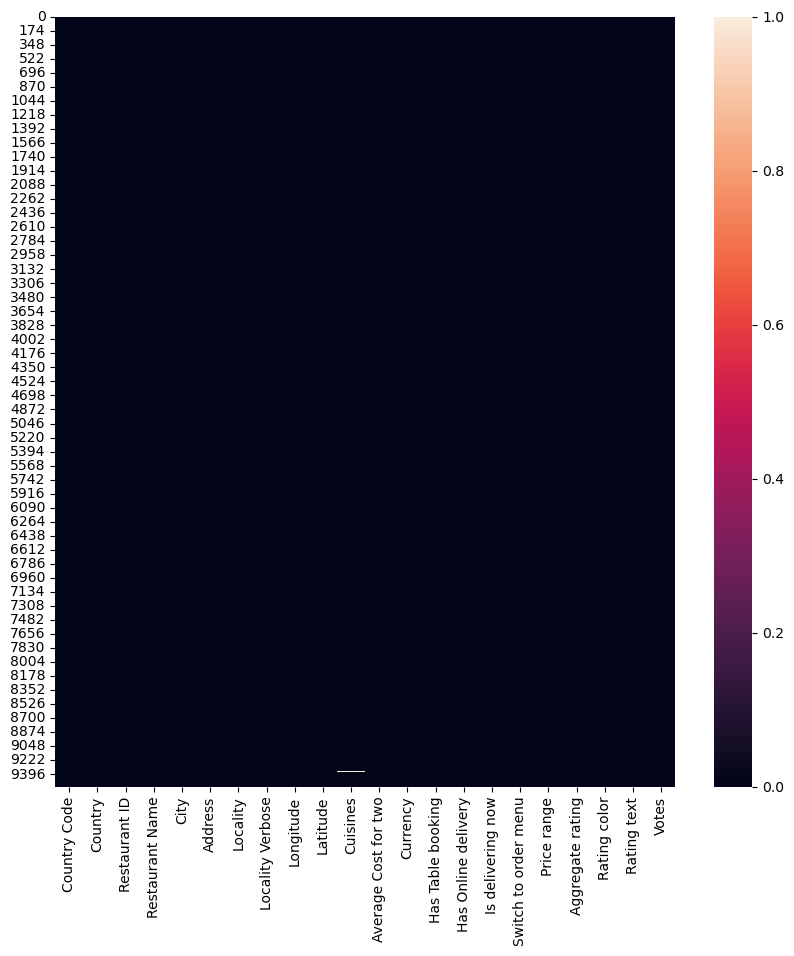

In [16]:
# Checking null values thru graph

plt.figure(figsize=(10,10))
sns.heatmap(df.isnull())

Null Values present only in Cuisines column in Dataset

In [17]:
df["Cuisines"]=df['Cuisines'].fillna(df['Cuisines'].mode()[0])

In [18]:
## Chekcing Null Values
df.isnull().sum()

Country Code            0
Country                 0
Restaurant ID           0
Restaurant Name         0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [19]:
#unique values of dataset
df.nunique()

Country Code              15
Country                   15
Restaurant ID           9551
Restaurant Name         7446
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
dtype: int64

In [20]:
ratings = df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:"Rating Count"})
ratings

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


##### We can see that the rating according to rating text its good, Excellent or very good

In [21]:
pd.crosstab(df['Rating text'],df['Rating color'])

Rating color,Dark Green,Green,Orange,Red,White,Yellow
Rating text,,,,,,
Average,0,0,3737,0,0,0
Excellent,301,0,0,0,0,0
Good,0,0,0,0,0,2100
Not rated,0,0,0,0,2148,0
Poor,0,0,0,186,0,0
Very Good,0,1079,0,0,0,0


### Univariate Analysis

In [22]:
df['Country Code'].value_counts()

1      8652
216     434
215      80
30       60
189      60
214      60
148      40
208      34
14       24
162      22
94       21
166      20
184      20
191      20
37        4
Name: Country Code, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'Australia'),
  Text(2, 0, 'Brazil'),
  Text(3, 0, 'Canada'),
  Text(4, 0, 'Indonesia'),
  Text(5, 0, 'New Zealand'),
  Text(6, 0, 'Phillipines'),
  Text(7, 0, 'Qatar'),
  Text(8, 0, 'Singapore'),
  Text(9, 0, 'South Africa'),
  Text(10, 0, 'Sri Lanka'),
  Text(11, 0, 'Turkey'),
  Text(12, 0, 'UAE'),
  Text(13, 0, 'United Kingdom'),
  Text(14, 0, 'United States')])

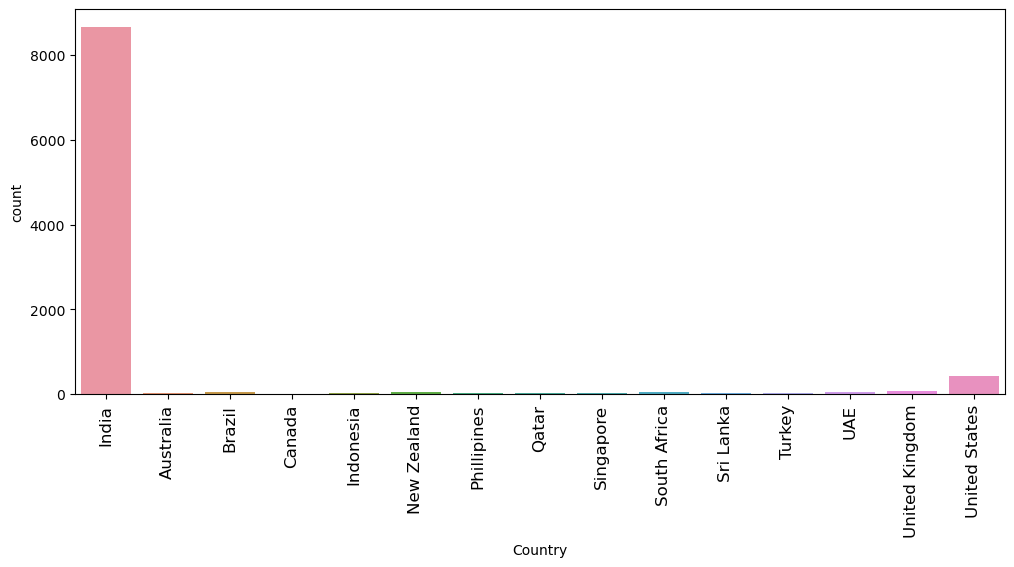

In [23]:
# Checking thru graph
plt.figure(figsize=(12,5))
sns.countplot(df, x="Country")
plt.xticks(fontsize=12,rotation=90)

In [24]:
## Its alomost showing in India

In [25]:
df['Currency'].value_counts()

Indian Rupees(Rs.)        8652
Dollar($)                  482
Pounds(£)                  80
Brazilian Real(R$)          60
Rand(R)                     60
Emirati Diram(AED)          60
NewZealand($)               40
Turkish Lira(TL)            34
Botswana Pula(P)            22
Indonesian Rupiah(IDR)      21
Qatari Rial(QR)             20
Sri Lankan Rupee(LKR)       20
Name: Currency, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Indian Rupees(Rs.)'),
  Text(1, 0, 'Dollar($)'),
  Text(2, 0, 'Brazilian Real(R$)'),
  Text(3, 0, 'Indonesian Rupiah(IDR)'),
  Text(4, 0, 'NewZealand($)'),
  Text(5, 0, 'Botswana Pula(P)'),
  Text(6, 0, 'Qatari Rial(QR)'),
  Text(7, 0, 'Rand(R)'),
  Text(8, 0, 'Sri Lankan Rupee(LKR)'),
  Text(9, 0, 'Turkish Lira(TL)'),
  Text(10, 0, 'Emirati Diram(AED)'),
  Text(11, 0, 'Pounds(\x8c£)')])

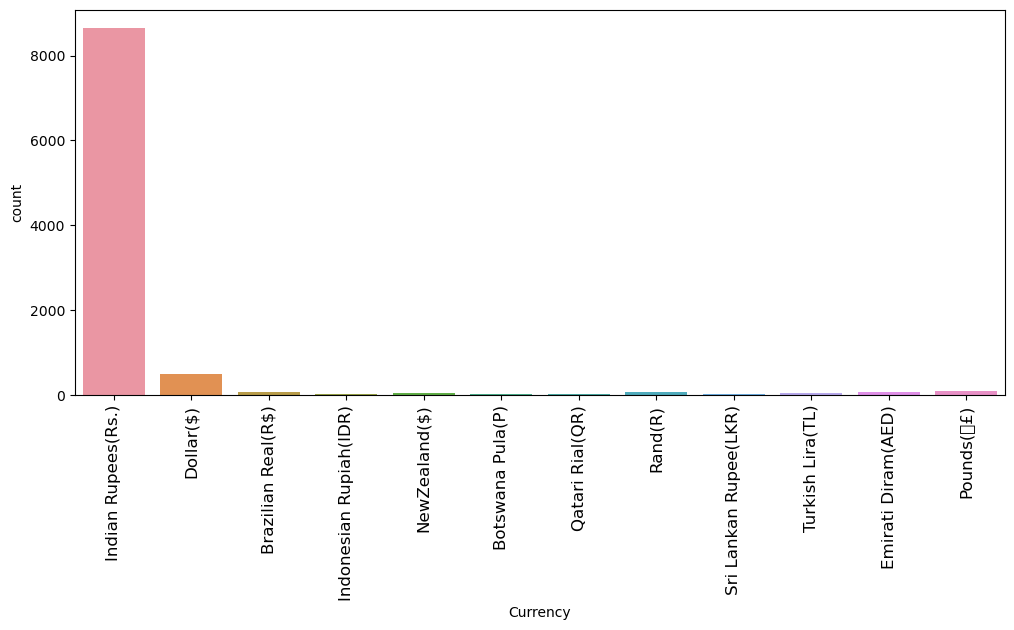

In [26]:
plt.figure(figsize=(12,5))
sns.countplot(df, x="Currency")
plt.xticks(fontsize=12,rotation=90)

We can see that mostly currecny is belong to India Currency

In [27]:
df['Has Table booking'].value_counts()

No     8393
Yes    1158
Name: Has Table booking, dtype: int64

<Axes: xlabel='Has Table booking', ylabel='count'>

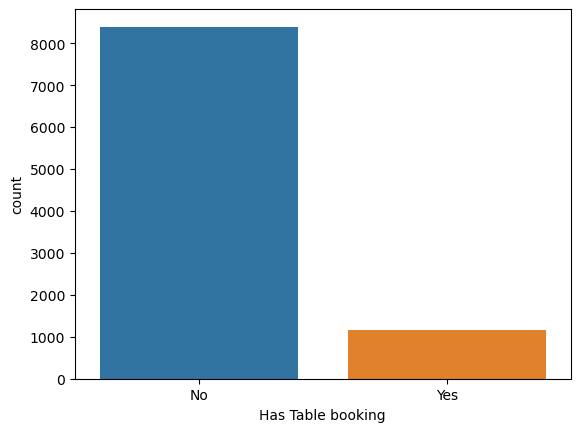

In [28]:
sns.countplot(df, x="Has Table booking")

In [29]:
df['Has Online delivery'].value_counts()

No     7100
Yes    2451
Name: Has Online delivery, dtype: int64

<Axes: xlabel='Has Online delivery', ylabel='count'>

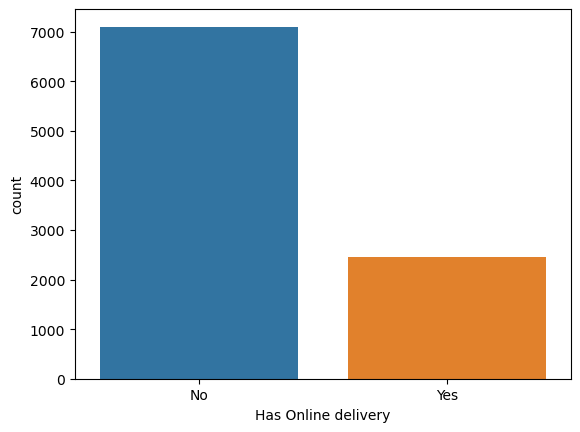

In [30]:
sns.countplot(df, x="Has Online delivery")

In [31]:
df['Is delivering now'].value_counts()

No     9517
Yes      34
Name: Is delivering now, dtype: int64

<Axes: xlabel='Is delivering now', ylabel='count'>

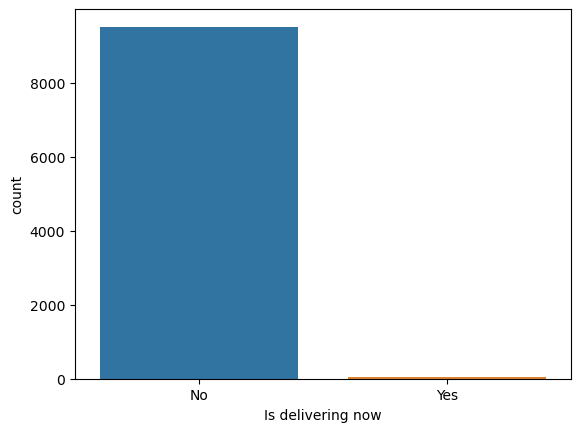

In [32]:
sns.countplot(df, x="Is delivering now")

In [33]:
df['Price range'].value_counts()

1    4444
2    3113
3    1408
4     586
Name: Price range, dtype: int64

<Axes: xlabel='Price range', ylabel='count'>

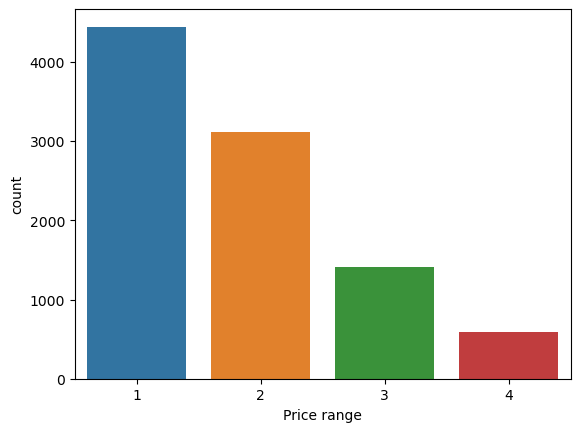

In [34]:
sns.countplot(df, x="Price range")

In [35]:
df['City'].value_counts()

New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Vineland Station       1
Yorkton                1
Bandung                1
Quezon City            1
Winchester Bay         1
Name: City, Length: 141, dtype: int64

<Axes: xlabel='Rating color', ylabel='count'>

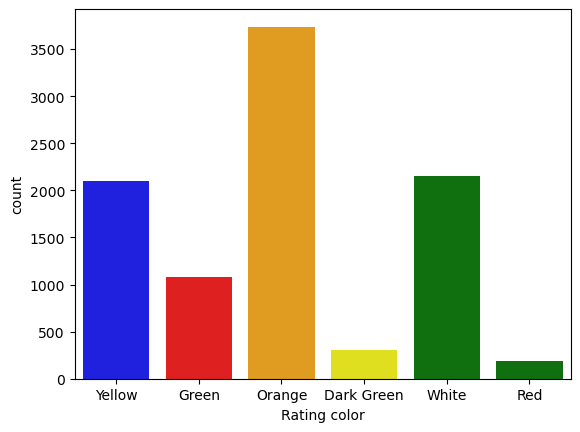

In [36]:
## Using Count Plot
sns.countplot(x="Rating color",data=df,palette=["blue","red","orange","yellow","green","green"])

Multivariate Analysis

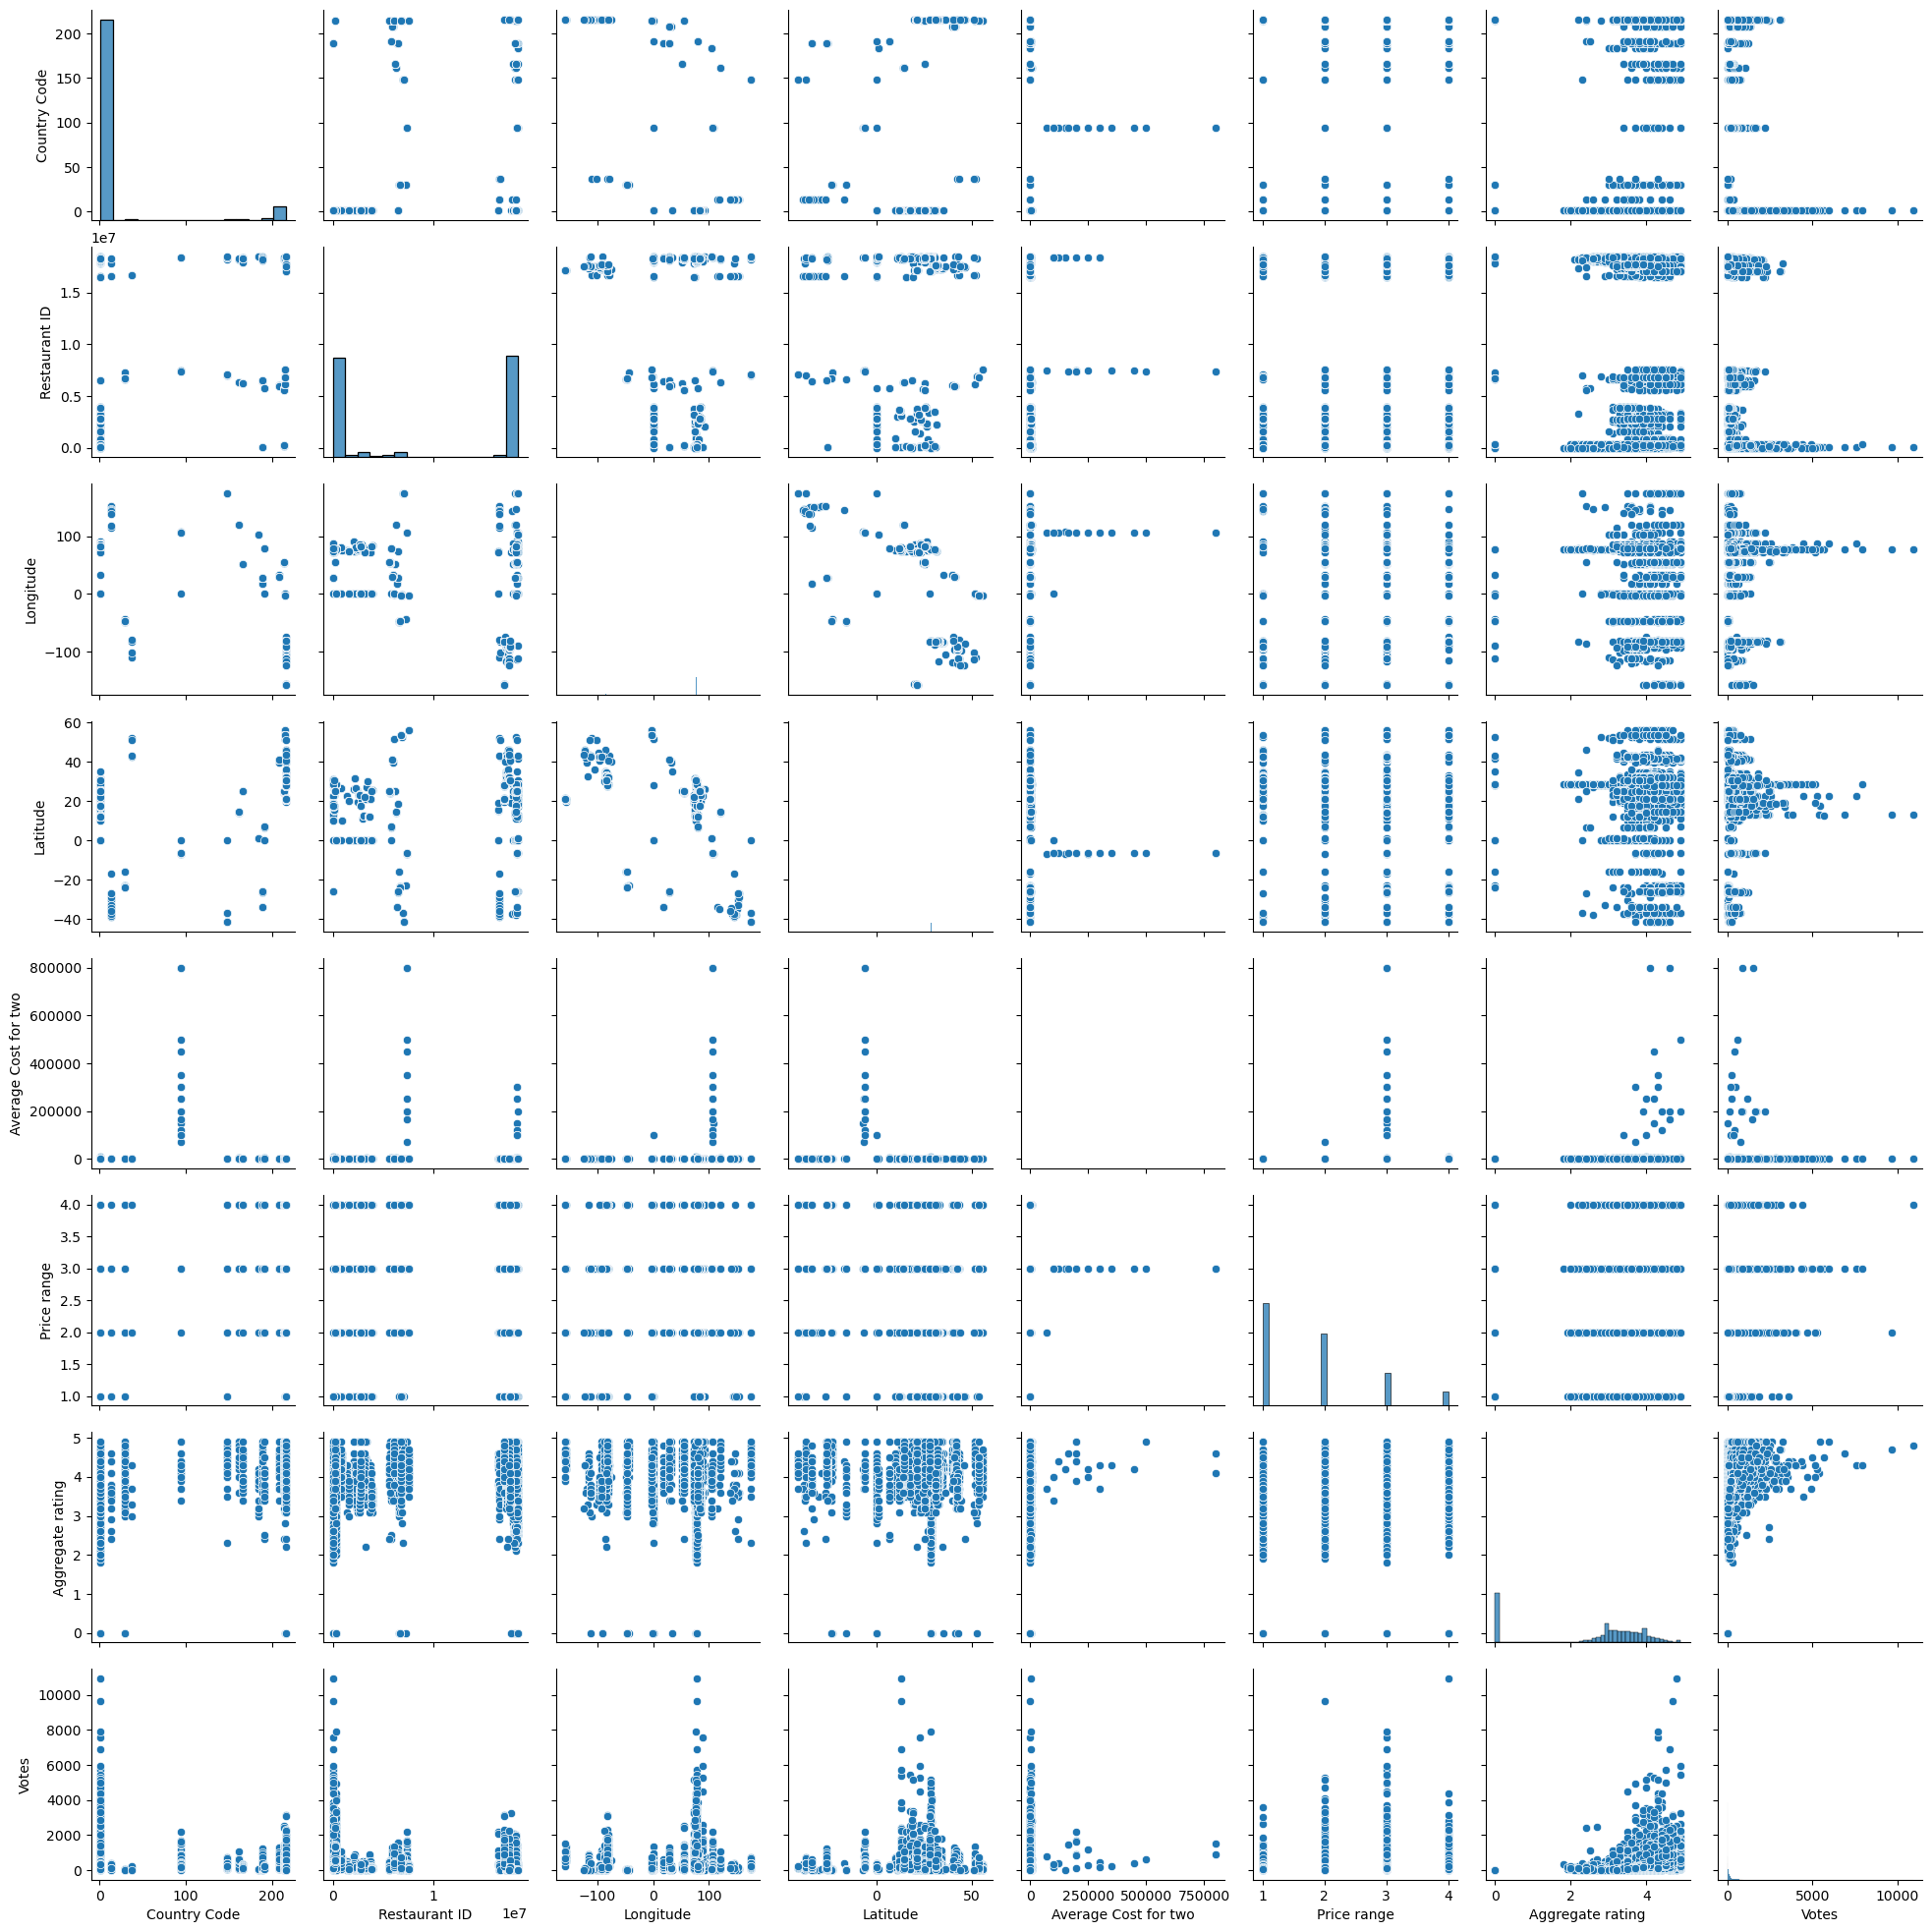

In [37]:
sns.pairplot(df)

Checking Distribution of Dataset

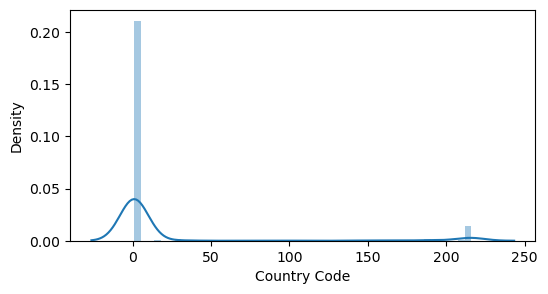

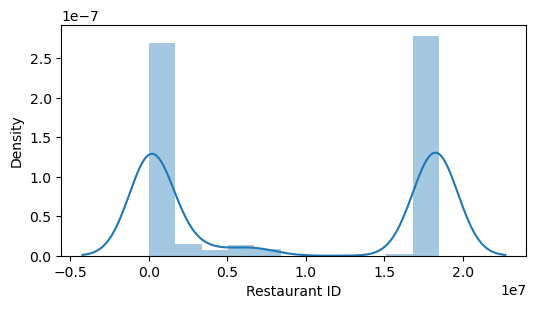

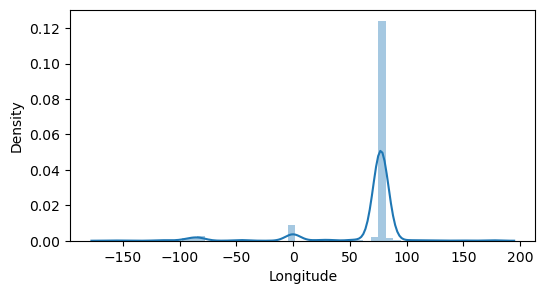

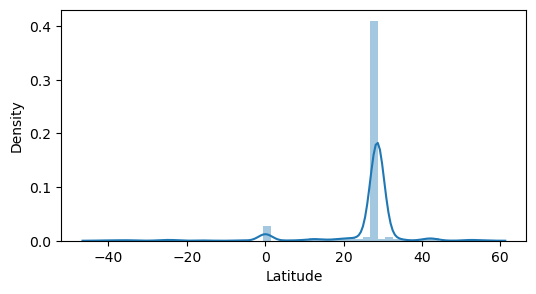

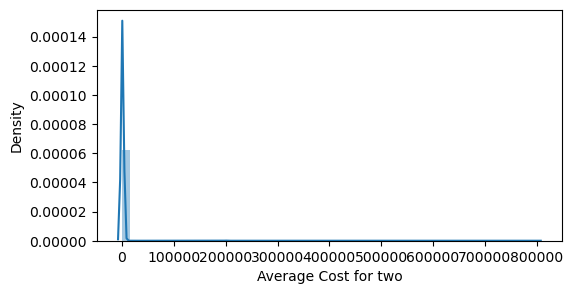

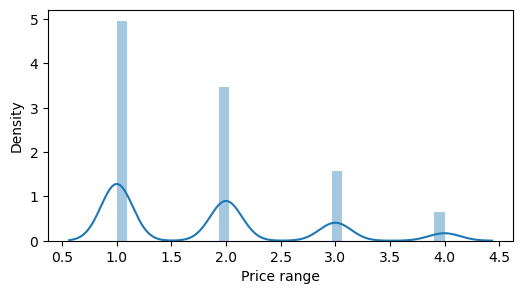

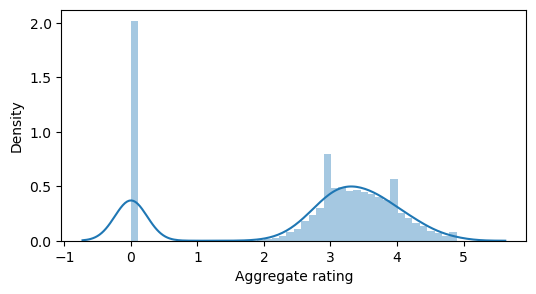

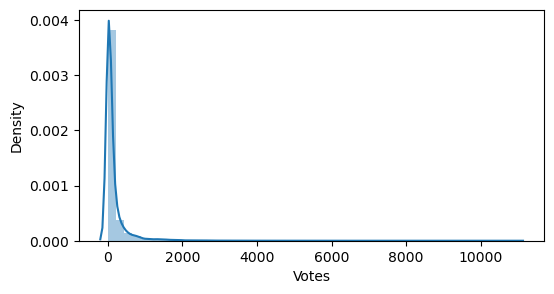

In [38]:
for i in df.columns:
    if df[i].dtypes!='object':
        plt.figure(figsize=(6,3))
        sns.distplot(df[i])

### Label Encoding

In [39]:
df.columns

Index(['Country Code', 'Country', 'Restaurant ID', 'Restaurant Name', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
le=LabelEncoder()

In [42]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=le.fit_transform(df[i])

In [43]:
df

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,3,3400025,3201,1,4553,17,17,78.011544,27.161661,...,4,0,0,0,0,3,3.9,5,2,140
1,1,3,3400341,5261,1,4605,17,17,0.000000,0.000000,...,4,0,0,0,0,2,3.5,5,2,71
2,1,3,3400005,6919,1,6234,17,17,78.011608,27.160832,...,4,0,0,0,0,2,3.6,5,2,94
3,1,3,3400021,1637,1,100,204,205,77.998092,27.195928,...,4,0,0,0,0,2,4.0,1,5,87
4,1,3,3400017,4922,1,1316,204,205,78.007553,27.201725,...,4,0,0,0,0,3,4.2,1,5,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,216,14,17697389,6794,135,1279,1174,1231,-92.335523,42.498400,...,2,0,0,0,0,1,3.7,5,2,101
9547,216,14,17697424,6839,135,2667,1174,1231,-92.335769,42.497919,...,2,0,0,0,0,1,3.5,5,2,58
9548,216,14,17697332,6945,135,957,1174,1231,-92.323400,42.465580,...,2,0,0,0,0,2,3.9,5,2,156
9549,216,14,17694056,6883,136,1910,1176,1233,-80.529488,40.396043,...,2,0,0,0,0,2,3.9,5,2,156


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Code          9551 non-null   int64  
 1   Country               9551 non-null   int32  
 2   Restaurant ID         9551 non-null   int64  
 3   Restaurant Name       9551 non-null   int32  
 4   City                  9551 non-null   int32  
 5   Address               9551 non-null   int32  
 6   Locality              9551 non-null   int32  
 7   Locality Verbose      9551 non-null   int32  
 8   Longitude             9551 non-null   float64
 9   Latitude              9551 non-null   float64
 10  Cuisines              9551 non-null   int32  
 11  Average Cost for two  9551 non-null   int64  
 12  Currency              9551 non-null   int32  
 13  Has Table booking     9551 non-null   int32  
 14  Has Online delivery   9551 non-null   int32  
 15  Is delivering now    

In [45]:
df_corr=df.corr()
df_corr

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
Country Code,1.000000,0.968700,0.148471,0.020012,-0.181728,-0.220342,-0.120075,-0.117543,-0.698299,0.019792,...,-0.033466,-0.061682,-0.154605,-0.018291,NaN,0.243327,0.282189,-0.187174,0.222685,0.154530
Country,0.968700,1.000000,0.161763,0.017560,-0.180959,-0.235815,-0.118784,-0.116406,-0.766221,0.181299,...,-0.105296,-0.062076,-0.140464,-0.016607,NaN,0.178035,0.255591,-0.155486,0.203846,0.155161
Restaurant ID,0.148471,0.161763,1.000000,0.003999,-0.005844,0.080615,0.069511,0.070102,-0.226081,-0.052081,...,-0.121472,-0.110071,-0.085089,0.012548,NaN,-0.134540,-0.326212,0.130540,0.251114,-0.147023
Restaurant Name,0.020012,0.017560,0.003999,1.000000,-0.001399,0.000763,0.004322,0.004281,-0.001920,0.009922,...,0.009669,0.041173,0.028082,0.011984,NaN,0.061275,0.029367,-0.007311,0.012131,0.018512
City,-0.181728,-0.180959,-0.005844,-0.001399,1.000000,-0.019763,0.096444,0.093142,0.117391,-0.004301,...,-0.071996,-0.003762,0.012723,-0.014039,NaN,-0.105759,-0.132163,0.110887,-0.098985,-0.078406
Address,-0.220342,-0.235815,0.080615,0.000763,-0.019763,1.000000,0.159555,0.160495,0.185801,-0.038654,...,0.069499,0.006428,0.029874,0.031267,NaN,-0.034952,-0.151153,0.071264,-0.008029,-0.101754
Locality,-0.120075,-0.118784,0.069511,0.004322,0.096444,0.159555,1.000000,0.999465,0.086448,-0.020424,...,0.023723,-0.065594,-0.030993,-0.007299,NaN,-0.114459,-0.174336,0.036831,-0.036969,-0.123569
Locality Verbose,-0.117543,-0.116406,0.070102,0.004281,0.093142,0.160495,0.999465,1.000000,0.084342,-0.020905,...,0.022966,-0.065132,-0.031766,-0.007353,NaN,-0.112313,-0.173254,0.037104,-0.035430,-0.122877
Longitude,-0.698299,-0.766221,-0.226081,-0.001920,0.117391,0.185801,0.086448,0.084342,1.000000,0.043207,...,0.337334,0.100488,0.178757,0.018787,NaN,-0.078939,-0.116818,0.059979,-0.181466,-0.085101
Latitude,0.019792,0.181299,-0.052081,0.009922,-0.004301,-0.038654,-0.020424,-0.020905,0.043207,1.000000,...,-0.101864,0.054658,0.118722,0.015001,NaN,-0.166688,0.000516,0.042590,-0.129447,-0.022962


<Axes: >

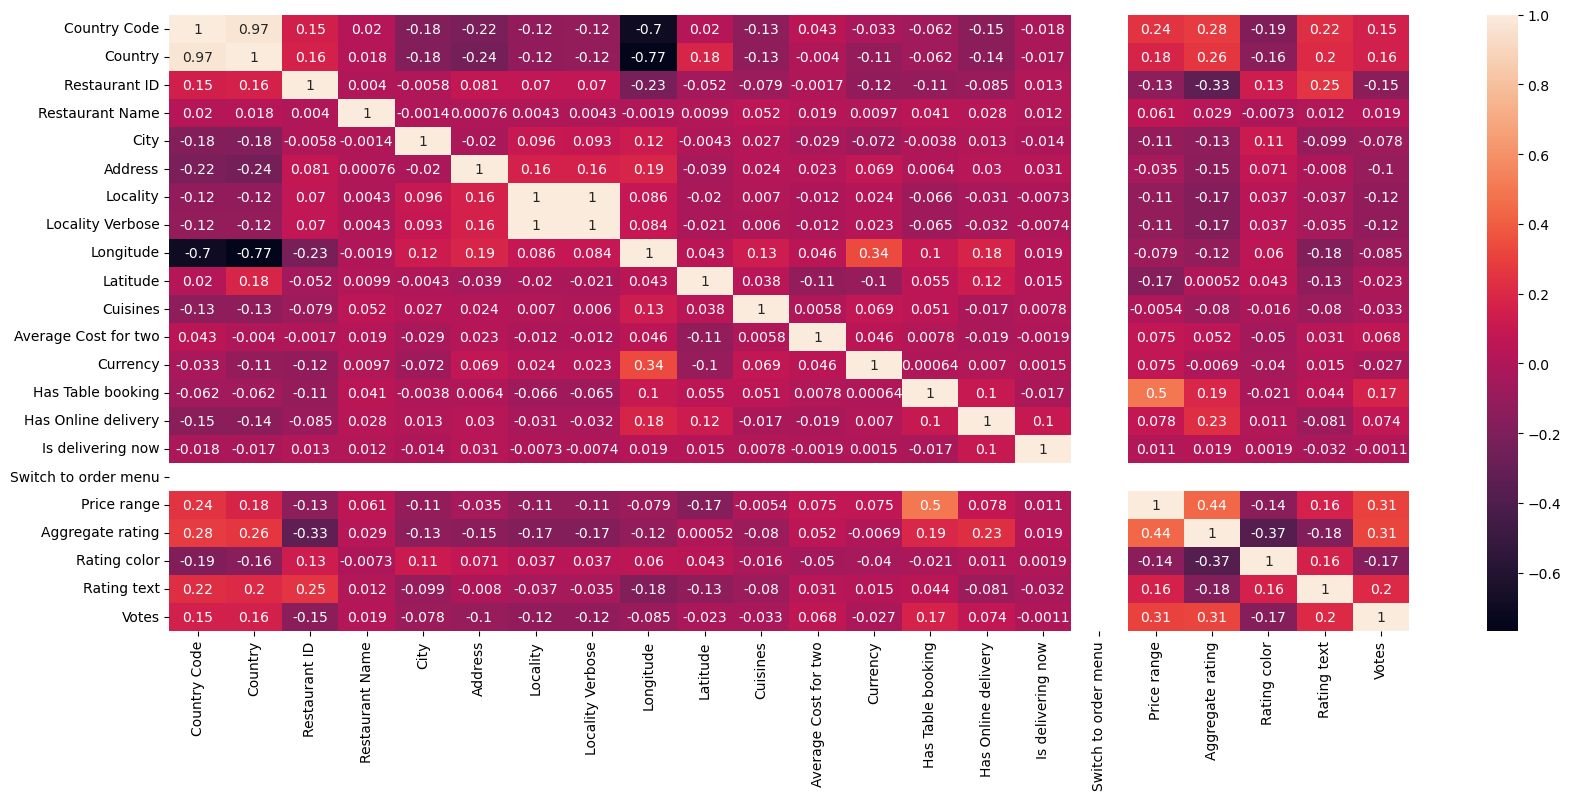

In [46]:
plt.figure(figsize=(20,8))
sns.heatmap(df_corr,annot=True,annot_kws={'size':10})

In [47]:
corr=df.corr()
corr['Average Cost for two'].sort_values(ascending=False)

Average Cost for two    1.000000
Price range             0.075083
Votes                   0.067783
Aggregate rating        0.051792
Longitude               0.045891
Currency                0.045615
Country Code            0.043225
Rating text             0.031439
Address                 0.022749
Restaurant Name         0.019241
Has Table booking       0.007758
Cuisines                0.005831
Restaurant ID          -0.001693
Is delivering now      -0.001862
Country                -0.004034
Locality Verbose       -0.011852
Locality               -0.012136
Has Online delivery    -0.018974
City                   -0.028838
Rating color           -0.049970
Latitude               -0.111088
Switch to order menu         NaN
Name: Average Cost for two, dtype: float64

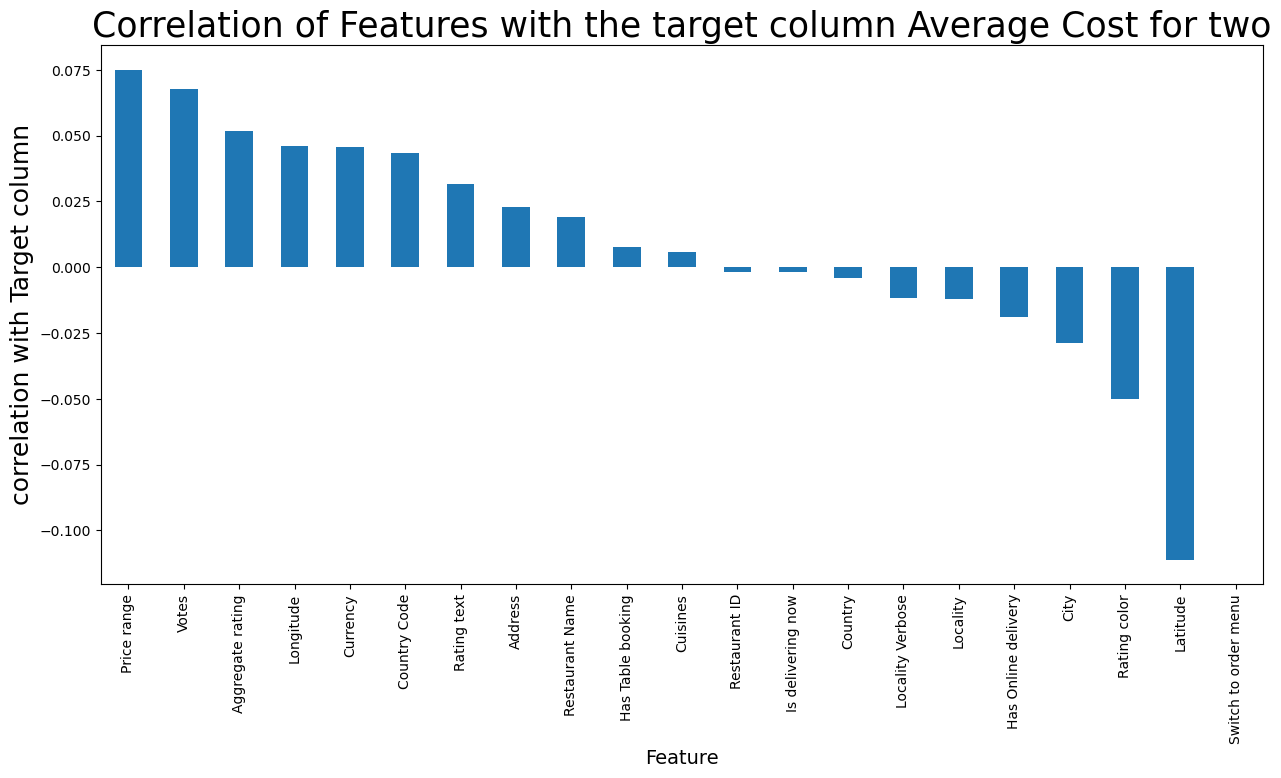

In [48]:
plt.figure(figsize=(15,7))
df.corr()["Average Cost for two"].sort_values(ascending=False).drop(["Average Cost for two"]).plot.bar()
plt.xlabel("Feature", fontsize= 14)
plt.ylabel("correlation with Target column", fontsize = 18)
plt.title("Correlation of Features with the target column Average Cost for two", fontsize=25)
plt.show()

In [49]:
corr=df.corr()
corr['Price range'].sort_values(ascending=False)

Price range             1.000000
Has Table booking       0.501925
Aggregate rating        0.437944
Votes                   0.309444
Country Code            0.243327
Country                 0.178035
Rating text             0.164242
Has Online delivery     0.077918
Currency                0.075179
Average Cost for two    0.075083
Restaurant Name         0.061275
Is delivering now       0.010940
Cuisines               -0.005350
Address                -0.034952
Longitude              -0.078939
City                   -0.105759
Locality Verbose       -0.112313
Locality               -0.114459
Restaurant ID          -0.134540
Rating color           -0.140468
Latitude               -0.166688
Switch to order menu         NaN
Name: Price range, dtype: float64

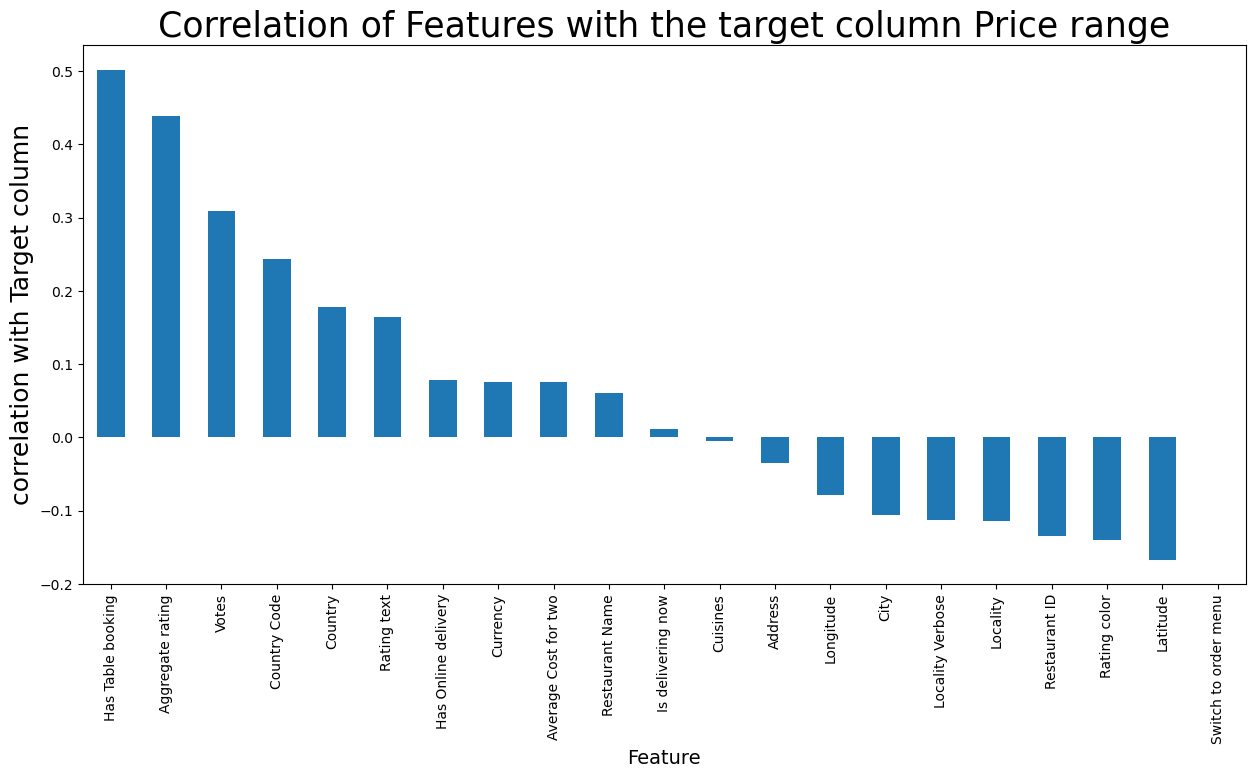

In [50]:
plt.figure(figsize=(15,7))
df.corr()["Price range"].sort_values(ascending=False).drop(["Price range"]).plot.bar()
plt.xlabel("Feature", fontsize= 14)
plt.ylabel("correlation with Target column", fontsize = 18)
plt.title("Correlation of Features with the target column Price range", fontsize=25)
plt.show()


### Checking Skewness

In [51]:
df.skew()

Country Code             3.043965
Country                  3.312721
Restaurant ID            0.061570
Restaurant Name          0.044637
City                    -1.193777
Address                 -0.040407
Locality                -0.253554
Locality Verbose        -0.183064
Longitude               -2.807328
Latitude                -3.081635
Cuisines                -0.307425
Average Cost for two    35.477915
Currency                 2.858093
Has Table booking        2.321100
Has Online delivery      1.114620
Is delivering now       16.673412
Switch to order menu     0.000000
Price range              0.889618
Aggregate rating        -0.954130
Rating color             0.046009
Rating text              0.431408
Votes                    8.807637
dtype: float64

### Checking Outliers

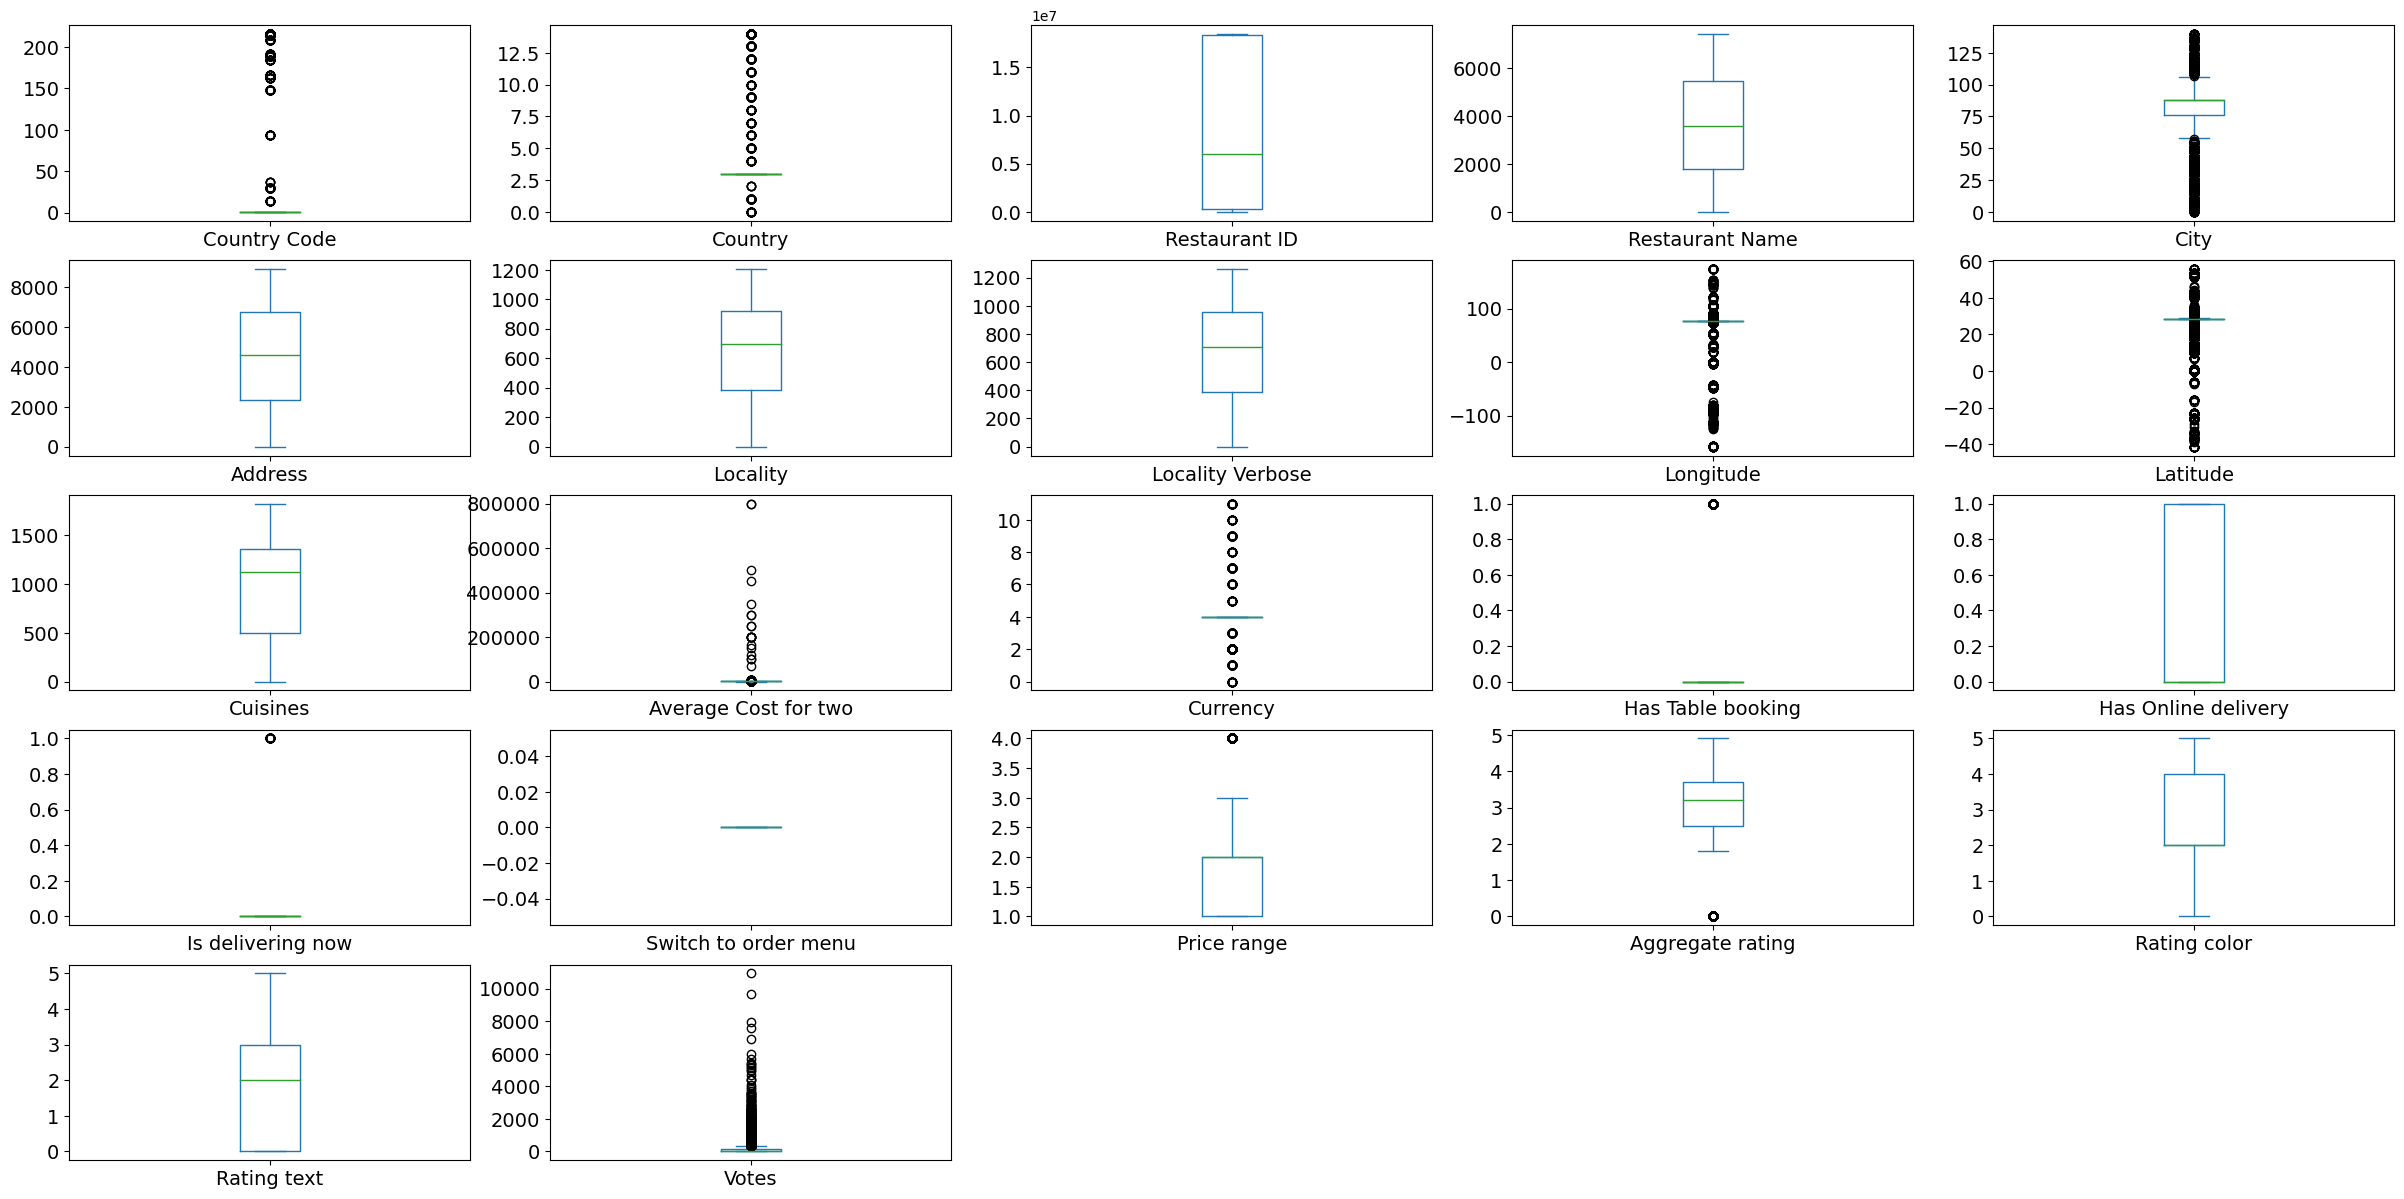

In [52]:
df.plot(kind="box", subplots=True, layout=(10,5), figsize=(30,30), fontsize=14)
plt.show()

#### Removing Outliers

In [53]:
from scipy.stats import zscore

In [54]:
z=np.abs(zscore(df))
z

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,0.306015,0.277839,0.642824,0.211034,3.332289,0.004116,2.029851,1.990609,0.334861,0.118764,...,0.024395,0.371446,0.587547,0.059771,NaN,1.319803,0.813580,1.371170,0.124686,0.039312
1,0.306015,0.277839,0.642788,0.750323,3.332289,0.024385,2.029851,1.990609,1.546527,2.348827,...,0.024395,0.371446,0.587547,0.059771,NaN,0.215516,0.549780,1.371170,0.124686,0.199722
2,0.306015,0.277839,0.642826,1.524074,3.332289,0.659328,2.029851,1.990609,0.334862,0.118689,...,0.024395,0.371446,0.587547,0.059771,NaN,0.215516,0.615730,1.371170,0.124686,0.146252
3,0.306015,0.277839,0.642824,0.940918,3.332289,1.731552,1.437798,1.423849,0.334536,0.121877,...,0.024395,0.371446,0.587547,0.059771,NaN,0.215516,0.879530,1.308053,1.895070,0.162525
4,0.306015,0.277839,0.642825,0.592119,3.332289,1.257585,1.437798,1.423849,0.334765,0.122404,...,0.024395,0.371446,0.587547,0.059771,NaN,1.319803,1.011430,1.308053,1.895070,0.046706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,3.482693,3.870249,0.983529,1.465740,2.444146,1.272007,1.633280,1.669214,3.773364,1.512081,...,2.163326,0.371446,0.587547,0.059771,NaN,0.888771,0.681680,1.371170,0.124686,0.129978
9547,3.482693,3.870249,0.983533,1.486740,2.444146,0.730999,1.633280,1.669214,3.773370,1.512037,...,2.163326,0.371446,0.587547,0.059771,NaN,0.888771,0.549780,1.371170,0.124686,0.229944
9548,3.482693,3.870249,0.983522,1.536208,2.444146,1.397515,1.633280,1.669214,3.773071,1.509099,...,2.163326,0.371446,0.587547,0.059771,NaN,0.215516,0.813580,1.371170,0.124686,0.002115
9549,3.482693,3.870249,0.983150,1.507274,2.487254,1.026059,1.639612,1.675243,3.488640,1.321086,...,2.163326,0.371446,0.587547,0.059771,NaN,0.215516,0.813580,1.371170,0.124686,0.002115


In [55]:
print(np.where(z>3))

# These points determine the point of outliers


(array([   0,    1,    2, ..., 9550, 9550, 9550], dtype=int64), array([4, 4, 4, ..., 0, 1, 8], dtype=int64))


In [56]:
df_new=df[(z<3).all(axis=1)]
df_new

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes


In [57]:
# This new Dataset formed is without the outliers

In [58]:
df.shape,df_new.shape

((9551, 22), (0, 22))

In [59]:
Data_loss=(9551-8408)/9551*100

In [60]:
Data_loss

11.967333263532614

### Skewness

In [61]:
df.skew()

Country Code             3.043965
Country                  3.312721
Restaurant ID            0.061570
Restaurant Name          0.044637
City                    -1.193777
Address                 -0.040407
Locality                -0.253554
Locality Verbose        -0.183064
Longitude               -2.807328
Latitude                -3.081635
Cuisines                -0.307425
Average Cost for two    35.477915
Currency                 2.858093
Has Table booking        2.321100
Has Online delivery      1.114620
Is delivering now       16.673412
Switch to order menu     0.000000
Price range              0.889618
Aggregate rating        -0.954130
Rating color             0.046009
Rating text              0.431408
Votes                    8.807637
dtype: float64

In [62]:
from sklearn.preprocessing import power_transform

In [63]:
x_new=power_transform(df)
df_new=pd.DataFrame(x_new,columns=df.columns)

In [64]:
df_new.skew()

Country Code             2.780362
Country                 -1.341627
Restaurant ID           -0.339181
Restaurant Name         -0.271708
City                    -0.203048
Address                 -0.300427
Locality                -0.304129
Locality Verbose        -0.279300
Longitude               -0.803832
Latitude                -0.293200
Cuisines                -0.383190
Average Cost for two     0.142365
Currency                 0.448602
Has Table booking        2.321100
Has Online delivery      1.114620
Is delivering now       16.673412
Switch to order menu     0.000000
Price range              0.182963
Aggregate rating        -0.610806
Rating color            -0.103780
Rating text             -0.059959
Votes                   -0.004029
dtype: float64

In [65]:
df=df_new

In [66]:
df.skew()


Country Code             2.780362
Country                 -1.341627
Restaurant ID           -0.339181
Restaurant Name         -0.271708
City                    -0.203048
Address                 -0.300427
Locality                -0.304129
Locality Verbose        -0.279300
Longitude               -0.803832
Latitude                -0.293200
Cuisines                -0.383190
Average Cost for two     0.142365
Currency                 0.448602
Has Table booking        2.321100
Has Online delivery      1.114620
Is delivering now       16.673412
Switch to order menu     0.000000
Price range              0.182963
Aggregate rating        -0.610806
Rating color            -0.103780
Rating text             -0.059959
Votes                   -0.004029
dtype: float64

Splitting data into Independent Features and Dependent Features

In [67]:
x = df.drop(['Average Cost for two'],axis=1)
Y = df['Average Cost for two']

Splitting Data into training and testing set

In [176]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,Y, test_size = 0.2, random_state = 0)

Model Building & Evaluation

In [177]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

Linear Regression

In [178]:
lr=LinearRegression()
lr.fit(x_train,y_train)
print("Linear Regression is successfully implemented")

lr_pred=lr.predict(x_test)
lr_pred

# Accuracy test
lr_accuracy=r2_score(y_test,lr_pred)
print("r2_score:- ", lr_accuracy*100)

print("mean_absolute_error:- ",mean_absolute_error(y_test,lr_pred))
print("mean_squared_error:- ",mean_squared_error(y_test,lr_pred))
print("Root_mean_squared_error:- ",np.sqrt(mean_squared_error(y_test,lr_pred)))

Linear Regression is successfully implemented
r2_score:-  69.8059749519548
mean_absolute_error:-  0.3047928768543659
mean_squared_error:-  0.2813865293468729
Root_mean_squared_error:-  0.530458791374856


In [179]:
lr_pred=lr.predict(x_test)
lr_pred

array([ 0.79050298,  0.90542832,  0.61302708, ...,  0.41945742,
       -0.34476064,  0.74265824])

Random Forest Regressor

In [72]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
print("Random Forest Regressor is successfully implemented")

rfr_pred=rfr.predict(x_test)
rfr_pred

# Accuracy test
rfr_accuracy=r2_score(y_test,rfr_pred)
print("r2_score:- ", rfr_accuracy*100)

print("mean_absolute_error:- ",mean_absolute_error(y_test,rfr_pred))
print("mean_squared_error:- ",mean_squared_error(y_test,rfr_pred))
print("Root_mean_squared_error:- ",np.sqrt(mean_squared_error(y_test,rfr_pred)))

Random Forest Regressor is successfully implemented
r2_score:-  87.33143349081438
mean_absolute_error:-  0.20094149718068102
mean_squared_error:-  0.11806189986752225
Root_mean_squared_error:-  0.3436013676741148


KNeighborsRegressor

In [73]:
from sklearn.neighbors import KNeighborsRegressor

In [74]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
print("KNeighbors Regressor is successfully implemented")

Knn_pred=knn.predict(x_test)
Knn_pred

# Accuracy test
Knn_accuracy=r2_score(y_test,Knn_pred)
print("r2_score:- ", Knn_accuracy*100)

print("mean_absolute_error:- ",mean_absolute_error(y_test,Knn_pred))
print("mean_squared_error:- ",mean_squared_error(y_test,Knn_pred))
print("Root_mean_squared_error:- ",np.sqrt(mean_squared_error(y_test,Knn_pred)))


KNeighbors Regressor is successfully implemented
r2_score:-  79.07085308353301
mean_absolute_error:-  0.2862403891044935
mean_squared_error:-  0.19504454949760755
Root_mean_squared_error:-  0.44163848280874207


DecisionTree Regressor

In [75]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
print("DecisionTree Regressor is successfully implemented")

dtr_pred=dtr.predict(x_test)
dtr_pred

# Accuracy test
dtr_accuracy=r2_score(y_test,dtr_pred)
print("r2_score:- ", dtr_accuracy*100)

print("mean_absolute_error:- ",mean_absolute_error(y_test,dtr_pred))
print("mean_squared_error:- ",mean_squared_error(y_test,dtr_pred))
print("Root_mean_squared_error:- ",np.sqrt(mean_squared_error(y_test,dtr_pred)))

DecisionTree Regressor is successfully implemented
r2_score:-  78.90563999831586
mean_absolute_error:-  0.2563792035584768
mean_squared_error:-  0.19658421625545022
Root_mean_squared_error:-  0.4433781864903259


AdaBoost Regressor

In [76]:
from sklearn.ensemble import AdaBoostRegressor

In [77]:
abr=AdaBoostRegressor()
abr.fit(x_train,y_train)
print("AdaBoost Regressor is successfully implemented")

abr_pred=abr.predict(x_test)
abr_pred

# Accuracy test
abr_accuracy=r2_score(y_test,abr_pred)
print("r2_score:- ", abr_accuracy*100)

print("mean_absolute_error:- ",mean_absolute_error(y_test,abr_pred))
print("mean_squared_error:- ",mean_squared_error(y_test,abr_pred))
print("Root_mean_squared_error:- ",np.sqrt(mean_squared_error(y_test,abr_pred)))

AdaBoost Regressor is successfully implemented
r2_score:-  78.15800271838235
mean_absolute_error:-  0.3196851550690434
mean_squared_error:-  0.2035516563061249
Root_mean_squared_error:-  0.45116699381285075


Support Vector Regressor

In [78]:
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor

In [79]:
svr=SVR()
svr.fit(x_train,y_train)
print("Support Vector Regressor is successfully implemented")

svr_pred=svr.predict(x_test)
svr_pred

# Accuracy test
svr_accuracy=r2_score(y_test,svr_pred)
print("r2_score:- ", svr_accuracy*100)

print("mean_absolute_error:- ",mean_absolute_error(y_test,svr_pred))
print("mean_squared_error:- ",mean_squared_error(y_test,svr_pred))
print("Root_mean_squared_error:- ",np.sqrt(mean_squared_error(y_test,svr_pred)))


Support Vector Regressor is successfully implemented
r2_score:-  83.35015331825495
mean_absolute_error:-  0.23417736585436105
mean_squared_error:-  0.15516455869924176
Root_mean_squared_error:-  0.393909328017555


Extra Trees Regressor

In [80]:
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
print("Extra Trees Regressor is successfully implemented")

etr_pred=etr.predict(x_test)
etr_pred

# Accuracy test
etr_accuracy=r2_score(y_test,etr_pred)
print("r2_score:- ", etr_accuracy*100)

print("mean_absolute_error:- ",mean_absolute_error(y_test,etr_pred))
print("mean_squared_error:- ",mean_squared_error(y_test,etr_pred))
print("Root_mean_squared_error:- ",np.sqrt(mean_squared_error(y_test,etr_pred)))

Extra Trees Regressor is successfully implemented
r2_score:-  89.0177114521185
mean_absolute_error:-  0.20291947250986964
mean_squared_error:-  0.1023470058681146
Root_mean_squared_error:-  0.3199171859530441


In [81]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest Regressor','KNeighbors Regressor', 'AdaBoost Regressor','DecisionTree Regressor','Support Vector Regressor','Extra Trees Regressor'],
    'r2_Score': [lr_accuracy,rfr_accuracy,Knn_accuracy, abr_accuracy,dtr_accuracy,svr_accuracy,etr_accuracy]})


In [82]:
models.sort_values(['r2_Score'], ascending=[False])

,Model,r2_Score
6,Extra Trees Regressor,0.890177
1,Random Forest Regressor,0.873314
5,Support Vector Regressor,0.833502
2,KNeighbors Regressor,0.790709
4,DecisionTree Regressor,0.789056
3,AdaBoost Regressor,0.781580
0,Linear Regression,0.698060


In [83]:
from sklearn.model_selection import cross_val_score

Cross Validation 

In [84]:
scr1=cross_val_score(lr, x, Y, cv=5)
scr1

array([ 0.52642429,  0.77591767,  0.70910368,  0.77175313, -0.68920429])

In [85]:
print("The Cross Validation Score of Linear Regression Model is :", scr1.mean())

The Cross Validation Score of Linear Regression Model is : 0.4187988961519177


In [86]:
scr2=cross_val_score(rfr,x,Y,cv=5)
scr2

array([ 0.69286767,  0.86314549,  0.82378405,  0.87773837, -0.35461995])

In [87]:
print("The Cross Validation Score of Random Forest Regressor Model is :", scr2.mean())

The Cross Validation Score of Random Forest Regressor Model is : 0.5805831263527248


In [88]:
scr3=cross_val_score(knn,x,Y,cv=5)
scr3

array([ 0.62753505,  0.71829132,  0.68366198,  0.74462782, -0.46834866])

In [89]:
print("The Cross Validation Score of K Neighbors Regressor Model is :", scr3.mean())

The Cross Validation Score of K Neighbors Regressor Model is : 0.4611535021638165


In [90]:
scr4=cross_val_score(dtr,x,Y,cv=5)
scr4

array([ 0.62251406,  0.75961093,  0.60848063,  0.74722075, -0.46254069])

In [91]:
print("The Cross Validation Score of Decision Tree Regressor Model is :", scr4.mean())

The Cross Validation Score of Decision Tree Regressor Model is : 0.4550571338085567


In [92]:
scr5=cross_val_score(abr,x,Y,cv=5)
scr5

array([ 0.53910112,  0.63966789,  0.09579891,  0.61551726, -0.44419586])

In [93]:
print("The Cross Validation Score of AdaBoost Regressor Model is :", scr5.mean())

The Cross Validation Score of AdaBoost Regressor Model is : 0.2891778610027914


In [94]:
scr6=cross_val_score(svr,x,Y,cv=5)
scr6

array([ 0.67787049,  0.8007897 ,  0.75431878,  0.81233   , -0.60320505])

In [95]:
print("The Cross Validation Score of Support Vector Regressor Model is :", scr6.mean())

The Cross Validation Score of Support Vector Regressor Model is : 0.4884207836487848


In [96]:
scr7=cross_val_score(etr,x,Y,cv=5)
scr7

array([ 0.71853549,  0.85119301,  0.80513844,  0.86761144, -0.31162542])

In [97]:
print("The Cross Validation Score of Extra Trees Regressor Model is :", scr7.mean())

The Cross Validation Score of Extra Trees Regressor Model is : 0.5861705912283123


In [98]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest Regressor','KNeighbors Regressor','DecisionTree Regressor', 'AdaBoost Regressor','Support Vector Regressor','Extra Trees Regressor'],
    'Cross Validation': [scr1.mean(),scr2.mean(),scr3.mean(), scr4.mean(),scr5.mean(),scr6.mean(),scr7.mean()]})


In [99]:
models.sort_values(['Cross Validation'], ascending=[False])

,Model,Cross Validation
6,Extra Trees Regressor,0.586171
1,Random Forest Regressor,0.580583
5,Support Vector Regressor,0.488421
2,KNeighbors Regressor,0.461154
3,DecisionTree Regressor,0.455057
0,Linear Regression,0.418799
4,AdaBoost Regressor,0.289178


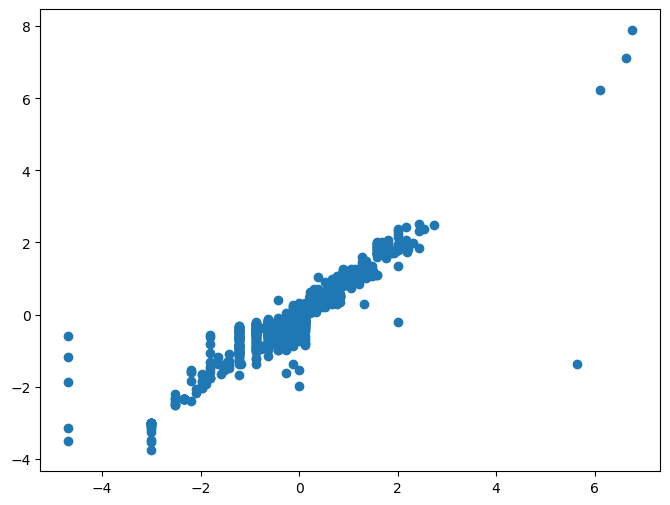

In [100]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,rfr_pred)

### Hyper Parameter Tuning

In [101]:
from sklearn.model_selection import GridSearchCV

In [172]:
parameter =  {
    'n_estimators': [100], 
    'max_depth': [ 10],      
    'min_samples_split': [2,3],  
    'min_samples_leaf': [1,2]    
}

In [173]:
GCV = GridSearchCV(RandomForestRegressor(),parameter,verbose =5)

In [180]:
GCV.fit(x_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.912 total time=   3.5s
[CV 2/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.916 total time=   3.4s
[CV 3/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.923 total time=   3.5s
[CV 4/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.907 total time=   3.5s
[CV 5/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.908 total time=   3.5s
[CV 1/5] END max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.913 total time=   3.5s
[CV 2/5] END max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.915 total time=   3.5s
[CV 3/5] END max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.923 total time=   3

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3], 'n_estimators': [100]},
             verbose=5)

In [181]:
GCV.best_params_

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [185]:
Final_mod =  RandomForestRegressor(max_depth= 10,min_samples_leaf= 2,min_samples_split= 3,n_estimators=100 )
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(y_test,pred))
print('Mean squared error :', mean_squared_error(y_test,pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(y_test,pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 0.2082167922465854
Mean squared error : 0.1223086011362506
Root Mean Squared Error: 0.34972646616498815


 R2 Score of Final Model :
0.8687574357283154




Saving the Random Forest Regressor Model (Serialization)

In [190]:
import joblib
joblib.dump(Final_mod,'Average_Cost_for_two.pkl')

['Average_Cost_for_two.pkl']

In [191]:
Model = joblib.load('Average_Cost_for_two.pkl')

# prediction  DataFrame
actual = np.array(y_test).flatten()
predicted = np.array(Model.predict(x_test)).flatten()
df_Predicted = pd.DataFrame({"Actual Values": actual, "Predicted Values": predicted}, index=range(len(actual)))
df_Predicted

,Actual Values,Predicted Values
0,0.880408,0.787451
1,0.880408,1.062070
2,0.533475,0.423307
3,1.284065,1.095773
4,0.004239,-0.173227
...,...,...
1906,-0.119352,-0.150725
1907,0.004239,-0.186768
1908,0.533475,0.429694
1909,-0.260745,-0.209741


### For Price Range
### Splitting data into Independent Features and Dependent Features

In [146]:
X = df_new.drop(['Price range'],axis=1)
y = df_new['Price range']

In [147]:
# Spliting the data for training & testing.
for i in range(0,200):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=i, test_size=.3)

In [154]:
## Model Building & Evaluation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor

In [155]:
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
etr = ExtraTreesRegressor()
adb=AdaBoostRegressor()
gbr=GradientBoostingRegressor()
xgb=XGBRegressor()
model = [rf,etr,dtc,adb,gbr,xgb]

for m in model:
    m.fit(X_train,y_train)
    m.score(X_train,y_train)
    max_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(y_test,max_pred))
    print('Mean squared error :', mean_squared_error(y_test,max_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,max_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(y_test,max_pred)) 
    print('===========================================================================================================')



 Error of  RandomForestRegressor() :
Mean absolute error : 0.0230136654899128
Mean squared error : 0.011247805524754375
Root Mean Squared Error: 0.10605567181793897


 R2 Score :
0.9887101511853278


 Error of  ExtraTreesRegressor() :
Mean absolute error : 0.03176733263904349
Mean squared error : 0.010810399758177531
Root Mean Squared Error: 0.10397307227439964


 R2 Score :
0.9891491919354947


 Error of  DecisionTreeRegressor() :
Mean absolute error : 0.01810155638204298
Mean squared error : 0.01612797151013587
Root Mean Squared Error: 0.12699595076275413


 R2 Score :
0.9838117435764653


 Error of  AdaBoostRegressor() :
Mean absolute error : 0.14034138476943192
Mean squared error : 0.04485348004786447
Root Mean Squared Error: 0.21178640194276985


 R2 Score :
0.9549788616599181


 Error of  GradientBoostingRegressor() :
Mean absolute error : 0.04434081608193714
Mean squared error : 0.01705454569660922
Root Mean Squared Error: 0.1305930537839177


 R2 Score :
0.9828817059386489




## Hyper Parameter Tuning

In [156]:
from sklearn.model_selection import GridSearchCV


In [162]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [ 4, 5],
    'learning_rate': [ 0.1, 0.2],
    'subsample': [ 0.9, 1.0],
    'colsample_bytree': [ 0.9, 1.0]
}

In [163]:
gsc = GridSearchCV(XGBRegressor(),param_grid,verbose =5)

In [164]:
gsc.fit(X_train,y_train)


Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.9;, score=0.989 total time=   0.0s
[CV 2/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.9;, score=0.991 total time=   0.0s
[CV 3/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.9;, score=0.987 total time=   0.0s
[CV 4/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.9;, score=0.988 total time=   0.0s
[CV 5/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.9;, score=0.989 total time=   0.0s
[CV 1/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=4, n_estimators=100, subsample=1.0;, score=0.989 total time=   0.0s
[CV 2/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=4, n_estimators=100, subsample=1.0;, score=0.990 total time=   0.0s
[CV 3/5] END c

[CV 3/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.9;, score=0.990 total time=   0.0s
[CV 4/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.9;, score=0.991 total time=   0.0s
[CV 5/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.9;, score=0.991 total time=   0.0s
[CV 1/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1.0;, score=0.993 total time=   0.0s
[CV 2/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1.0;, score=0.994 total time=   0.0s
[CV 3/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1.0;, score=0.992 total time=   0.0s
[CV 4/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1.0;, score=0.991 total time=   0.0s
[CV 5/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, n_estimat

[CV 1/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, n_estimators=100, subsample=1.0;, score=0.990 total time=   0.0s
[CV 2/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, n_estimators=100, subsample=1.0;, score=0.991 total time=   0.0s
[CV 3/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, n_estimators=100, subsample=1.0;, score=0.989 total time=   0.0s
[CV 4/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, n_estimators=100, subsample=1.0;, score=0.990 total time=   0.0s
[CV 5/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, n_estimators=100, subsample=1.0;, score=0.991 total time=   0.0s
[CV 1/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, n_estimators=200, subsample=0.9;, score=0.991 total time=   0.1s
[CV 2/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, n_estimators=200, subsample=0.9;, score=0.990 total time=   0.1s
[CV 3/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, n_estimat

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'colsample_bytree': [0.9, 1.0],
                         'learning_rate': [0.1, 0.2], 'max_depth': [4, 5],
                         'n_estimators': [100, 200], 'subsample': [0.9, 1.0]},
             verbose=5)

In [165]:
gsc.best_params_

{'colsample_bytree': 0.9,
 'learning_rate': 0.2,
 'max_depth': 5,
 'n_estimators': 200,
 'subsample': 1.0}

In [166]:
Final_mod=  XGBRegressor(colsample_bytree= 0.9,learning_rate = 0.1,max_depth = 5, n_estimators = 200,subsample= 0.9)

Final_mod.fit(X_train,y_train)
max_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(y_test,max_pred))
print('Mean squared error :', mean_squared_error(y_test,max_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,max_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(y_test,max_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 0.02553912753523739
Mean squared error : 0.008272794116236683
Root Mean Squared Error: 0.09095490155146496


 R2 Score of Final Model :
0.9916962829201067




### Saving Model of "Price Range"

In [167]:
import joblib
joblib.dump(Final_mod,'Price_Range.pkl')

['Price_Range.pkl']

### Prediction Based on Model

In [168]:
Model = joblib.load('Price_Range.pkl')

# prediction  DataFrame
actual = np.array(y_test).flatten()
predicted = np.array(Model.predict(X_test)).flatten()
df_Predicted = pd.DataFrame({"Actual Values": actual, "Predicted Values": predicted}, index=range(len(actual)))
df_Predicted

,Actual Values,Predicted Values
0,0.548245,0.546602
1,1.706541,1.601064
2,0.548245,0.546523
3,-1.015939,-1.015950
4,-1.015939,-1.011856
...,...,...
2861,1.284171,1.275159
2862,-1.015939,-0.980426
2863,-1.015939,-1.016949
2864,0.548245,0.548288
